In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train_V2.csv")
test = pd.read_csv("test_V2.csv")

In [3]:
xtrain = train.iloc[:,3:28]
ytrain = train.iloc[:,28]

xtest = train.iloc[:,3:28]

## Preprocessing

In [5]:
# does game length have any correlation with win percentage
import matplotlib.pyplot as plt

plt.scatter(x=train.iloc[:,14], y=train.iloc[:, 28])
plt.xlabel("Match Time (Seconds)")
plt.ylabel("Win Percentage")
plt.title("Any correlation between Match Time and Win Percentage")
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pcaData = xtrain.drop(['matchType'], axis=1)
pcaData.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,60,1241,0,0,...,-1,0,0.0000,0,0.00,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,57,0,0,0,...,1484,0,0.0045,0,11.04,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,47,0,0,0,...,1491,0,0.0000,0,0.00,0,0,161.80,2,0
3,0,0,32.90,0,0,0,75,0,0,0,...,1408,0,0.0000,0,0.00,0,0,202.70,3,0
4,0,0,100.00,0,0,0,45,0,1,1,...,1560,0,0.0000,0,0.00,0,0,49.75,2,0


In [20]:
dataTrans = pca.fit_transform(pcaData)

C:\Users\Avishka\Anaconda3\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\Avishka\Anaconda3\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


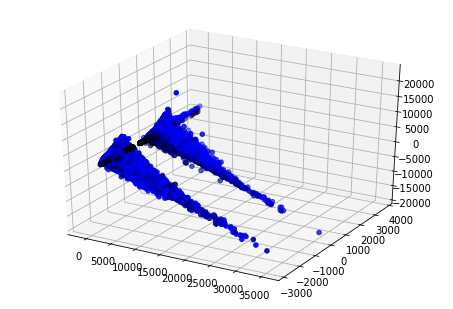

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = dataTrans[:,0]
sequence_containing_y_vals = dataTrans[:,1]
sequence_containing_z_vals = dataTrans[:,2]

pca.explained_variance_ratio_
pointColors = [ (0, 0, winPercentage) for winPercentage in ytrain]

# pointColors[0:10, :]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c=pointColors)
plt.show()

In [118]:
def reduce_match_type(df):
    mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
    df['matchType'] = df['matchType'].apply(mapper)
    return df


xtrain_copy = xtrain.copy()


In [136]:
xtrain_copy_reduced = reduce_match_type(xtrain_copy)
pointColors = []

for gameType in xtrain_copy_reduced.loc[:,'matchType']:
    if gameType == 'squad':
        pointColors.append((1, 0, 0))
    elif gameType == 'duo':
        pointColors.append((0, 1, 0))
    else:
        pointColors.append((0, 0, 1))
        
pointColors = np.array(pointColors)

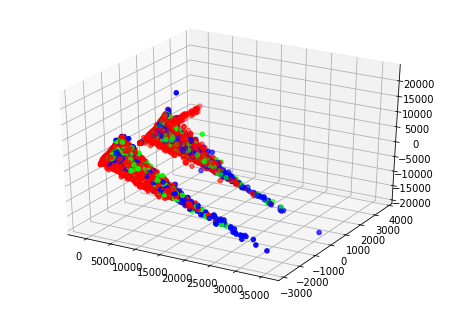

In [137]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c=pointColors)
plt.show()
# xtrain_copy_reduced.loc[:,'matchType'].size

In [139]:
pcafull = PCA()
pcafullTrans = pcafull.fit_transform(pcaData)


In [142]:
pcafull.explained_variance_

array([2.53129834e+06, 1.46784650e+06, 1.13110143e+06, 5.77012665e+04,
       2.55549787e+04, 1.06318574e+04, 2.80795864e+03, 1.62407655e+03,
       1.01754697e+03, 8.99039018e+02, 2.97756170e+02, 5.55248309e+00,
       3.88539960e+00, 1.24831093e+00, 1.14106543e+00, 5.68629181e-01,
       4.05883607e-01, 2.69113950e-01, 1.87313602e-01, 1.79126477e-01,
       9.61477217e-02, 2.77412091e-02, 8.25667199e-03, 5.27694967e-03])

In [149]:
pca2d = PCA(n_components=2)
twodTransData = pca2d.fit_transform(pcaData)


array([[-1039.22293817, -1357.71284089],
       [ -355.41678892,   979.69313557],
       [ -944.0564362 ,  1072.31763821],
       ...,
       [ -667.55456223,  1030.84238335],
       [  200.84677464,   834.19318807],
       [  792.84611752,  1024.80855257]])

C:\Users\Avishka\Anaconda3\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\Avishka\Anaconda3\lib\site-packages\matplotlib\colors.py:251: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


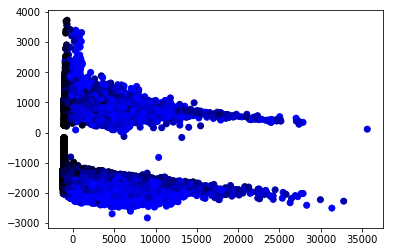

In [151]:
pointColors = [ (0, 0, winPercentage) for winPercentage in ytrain]
plt.clf()
plt.scatter(twodTransData[:,0],twodTransData[:,1],c=pointColors)

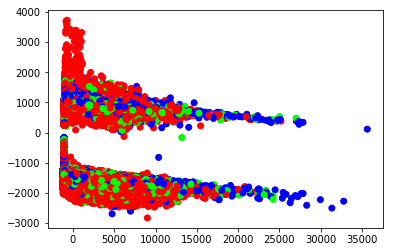

In [153]:
pointColors = []

for gameType in xtrain_copy_reduced.loc[:,'matchType']:
    if gameType == 'squad':
        pointColors.append((1, 0, 0))
    elif gameType == 'duo':
        pointColors.append((0, 1, 0))
    else:
        pointColors.append((0, 0, 1))
        
plt.scatter(twodTransData[:,0],twodTransData[:,1],c=pointColors)

(array([3.000000e+01, 4.240000e+02, 2.403000e+03, 6.847000e+03,
        7.879000e+03, 7.187620e+05, 1.840915e+06, 3.242320e+05,
        1.478727e+06, 6.674700e+04]),
 array([   9. ,  231.8,  454.6,  677.4,  900.2, 1123. , 1345.8, 1568.6,
        1791.4, 2014.2, 2237. ]),
 <a list of 10 Patch objects>)

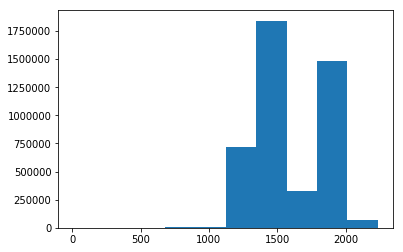

In [189]:
plt.clf()
plt.hist(xtrain.iloc[0:10000000, 11])

In [190]:
pcafull.components_

array([[ 6.96973755e-05,  5.27839668e-04,  2.69890486e-02,
         1.30478519e-04,  5.61043662e-05,  6.63835467e-04,
        -6.81097742e-03, -2.52203101e-02,  2.17134959e-04,
         8.56972134e-05,  9.58052981e-03,  5.98966594e-02,
        -9.83710466e-04, -9.84928195e-04,  3.57904739e-02,
         5.07470666e-05,  8.93541001e-01,  4.29673385e-06,
         1.85868210e-03,  5.52630853e-06,  7.37463454e-06,
         4.40780229e-01,  6.44988348e-04, -3.03223203e-02],
       [-2.43887490e-05, -6.72276018e-05, -7.70529992e-03,
        -3.90827145e-05, -1.37381790e-05, -6.24479548e-05,
         1.18665851e-03, -5.11136812e-01, -5.27116961e-05,
        -2.31573828e-05, -1.36094990e-03,  1.56644383e-02,
         9.49774499e-04,  8.90189622e-04,  6.02807838e-01,
        -9.75416613e-06, -2.29905391e-02,  5.75184754e-08,
        -2.45517937e-04,  5.12873228e-06,  2.17008649e-07,
        -7.49728328e-02, -8.06373378e-05, -6.07373523e-01],
       [ 1.22370096e-04,  7.01707456e-04,  5.05520756e

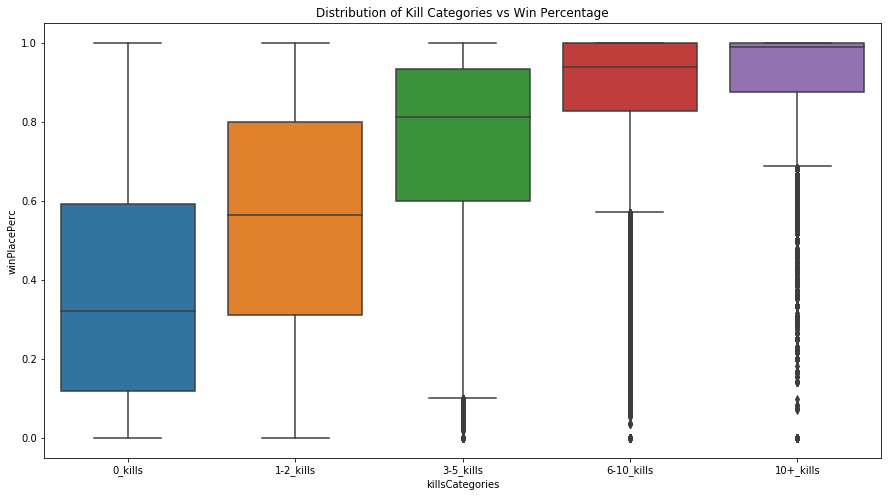

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

kills =train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

kills.columns

plt.figure(figsize=(15,8))
plt.title("Distribution of Kill Categories vs Win Percentage")
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

C:\Users\Avishka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


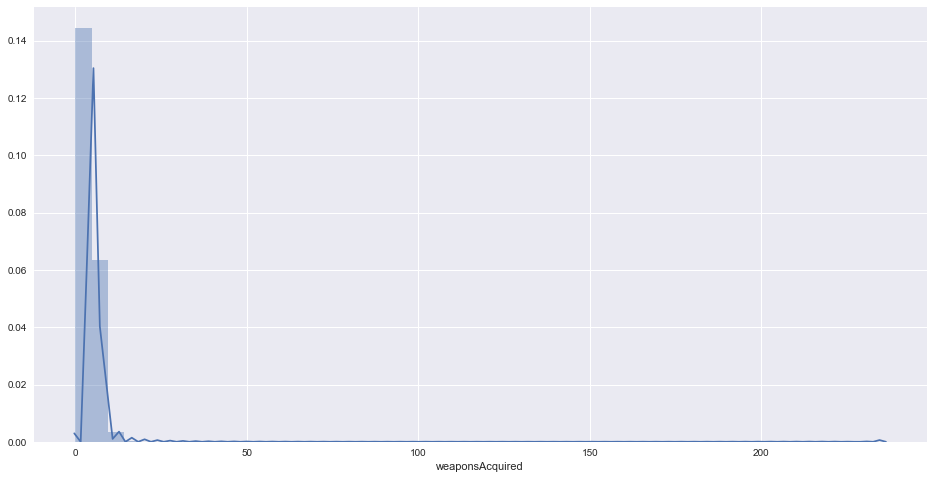

In [29]:
sns.set(rc={'figure.figsize':(16,8)})
sns.distplot(train['weaponsAcquired'])
